## data import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
import seaborn as sns
import datetime as dt
import matplotlib.font_manager as fm
import random

from matplotlib import gridspec
from scipy import stats

In [2]:
font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

['C:\\Windows\\Fonts\\constan.ttf',
 'C:\\Windows\\Fonts\\impact.ttf',
 'C:\\WINDOWS\\Fonts\\LeelUIsl.ttf',
 'C:\\Windows\\Fonts\\seguibli.ttf',
 'C:\\WINDOWS\\Fonts\\NirmalaB.ttf',
 'C:\\Windows\\Fonts\\verdana.ttf',
 'C:\\Windows\\Fonts\\constanb.ttf',
 'C:\\WINDOWS\\Fonts\\segoeuisl.ttf',
 'C:\\WINDOWS\\Fonts\\seguibli.ttf',
 'C:\\WINDOWS\\Fonts\\SitkaI.ttc',
 'C:\\WINDOWS\\Fonts\\calibrib.ttf',
 'C:\\WINDOWS\\Fonts\\simsunb.ttf',
 'C:\\Windows\\Fonts\\palab.ttf',
 'C:\\WINDOWS\\Fonts\\constan.ttf',
 'C:\\WINDOWS\\Fonts\\trebuc.ttf',
 'C:\\Windows\\Fonts\\calibrib.ttf',
 'C:\\Windows\\Fonts\\segoepr.ttf',
 'C:\\Windows\\Fonts\\l_10646.ttf',
 'C:\\Windows\\Fonts\\consolai.ttf',
 'C:\\Windows\\Fonts\\msyh.ttc',
 'C:\\WINDOWS\\Fonts\\marlett.ttf',
 'C:\\WINDOWS\\Fonts\\simsun.ttc',
 'C:\\Windows\\Fonts\\seguili.ttf',
 'C:\\Windows\\Fonts\\taileb.ttf',
 'C:\\WINDOWS\\Fonts\\ariali.ttf',
 'C:\\Windows\\Fonts\\cambriaz.ttf',
 'C:\\Windows\\Fonts\\timesbd.ttf',
 'C:\\Windows\\Fonts\\Sitka.

In [3]:
fm.get_fontconfig_fonts()
font_location = 'C:\\WINDOWS\\Fonts\\malgun.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_1444\2582751676.py:1: MatplotlibDeprecationWarning: 
The get_fontconfig_fonts function was deprecated in Matplotlib 3.5 and will be removed two minor releases later.
  fm.get_fontconfig_fonts()


In [4]:
FILES_DIR = '../files/'
log_df = pd.read_csv(FILES_DIR + 'log_csv.csv')

In [5]:
log = log_df.copy()

In [6]:
# column describe 
def descriptive_info(log):
    number_of_cells = log.count(axis=0, level=None, numeric_only=False)
    print('Total number of cells the datafile has: \n' + str(number_of_cells))
    print('\n')
    print('Printing descriptive statistics...\n\n', log.describe())

descriptive_info(log)

Total number of cells the datafile has: 
Unnamed: 0         5659541
uid                5473228
action_type        5659541
category1          5659541
category2          5659541
category3          4879535
collect_time       5659541
geoip_city_name    5242509
useragent_os       5659541
viewrate           5657112
viewtime           5659541
dtype: int64


Printing descriptive statistics...

          Unnamed: 0      viewrate      viewtime
count  5.659541e+06  5.657112e+06  5.659541e+06
mean   2.829770e+06  7.677686e+01  5.126022e+04
std    1.633769e+06  4.221447e+01  5.810345e+05
min    0.000000e+00  0.000000e+00  0.000000e+00
25%    1.414885e+06  1.000000e+02  8.940000e+02
50%    2.829770e+06  1.000000e+02  1.010400e+04
75%    4.244655e+06  1.000000e+02  4.800500e+04
max    5.659540e+06  1.000000e+02  8.636989e+07


In [7]:
# null값 퍼센트로 보기
(log.isnull().sum()/ log.shape[0]).sort_values(ascending=False)

category3          0.137821
geoip_city_name    0.073687
uid                0.032920
viewrate           0.000429
Unnamed: 0         0.000000
action_type        0.000000
category1          0.000000
category2          0.000000
collect_time       0.000000
useragent_os       0.000000
viewtime           0.000000
dtype: float64

In [8]:
# 서울과 경기도는 시, 구와 중복 데이터이기 때문에 drop한다
log_null_ts = log.copy()
drop_city = log_null_ts[log_null_ts['geoip_city_name'] != 'Seoul']
drop_city = drop_city[drop_city['geoip_city_name'] != 'Gyeonggi-do']

drop_city.isnull().sum().sort_values(ascending=False)

category3          643126
geoip_city_name    417032
uid                132162
viewrate             1722
Unnamed: 0              0
action_type             0
category1               0
category2               0
collect_time            0
useragent_os            0
viewtime                0
dtype: int64

In [111]:
# null값들을 un_** 으로 채워서 확인해보기
log_drop_null = drop_city
log_drop_null['geoip_city_name'].fillna('un_city_name', inplace = True)
log_drop_null['category3'].fillna('un_category', inplace = True)
log_drop_null['uid'].fillna('un_name', inplace = True)
log_drop_null.dropna(axis = 0, inplace = True)
print(log_drop_null.isnull().sum().sort_values(ascending=False)) # null값 퍼센트로 표현

Unnamed: 0         0
uid                0
action_type        0
category1          0
category2          0
category3          0
geoip_city_name    0
useragent_os       0
viewrate           0
viewtime           0
Hour               0
Minute             0
dtype: int64


In [10]:
log_drop_null

,Unnamed: 0,uid,action_type,category1,category2,category3,collect_time,geoip_city_name,useragent_os,viewrate,viewtime
0,0,avpKyWMn/xEADNlb,View,주방용품,그릇·홈세트,식판·나눔접시,2022-12-29 17:29:02,Seongnam-si,Windows,100.0,80033
1,1,0+5vEmGkOuAAB5j2,Basket,패브릭,매트,주방·다용도매트,2022-12-29 12:56:38,Yongin-si,Windows,0.0,0
3,3,dC9Fl2Ly9lcADrTn,Highlight,데코·식물,플라워·식물,화병·화분,2022-12-29 17:54:30,Gwangmyeong-si,Windows,0.0,0
4,4,09gKcGLg0I8ACyQy,View,가구,진열장·책장,책장,2022-12-29 18:45:05,Jongno-gu,Mac OS X,100.0,1238
5,5,091fXGIDYFEABcpA,Basket,수납·정리,화장대·테이블정리,티슈커버·케이스,2022-12-29 17:53:11,Incheon,Windows,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
5659533,5659533,3yfy5mOZpbYAAMpw,View,가전·디지털,주방가전,오븐·전자레인지,2022-12-29 12:45:14,Gangnam-gu,Android,100.0,6054
5659534,5659534,qE73wWOr1C8ABhBw,View,캠핑용품,캠핑생활용품,기타캠핑생활용품,2022-12-28 15:40:29,Songpa-gu,Windows,100.0,10006
5659537,5659537,PVMstmNg4I4ADq9R,Basket,가구,진열장·책장,책장,2022-12-28 14:30:09,Jinju,Windows,0.0,0
5659538,5659538,diRXdmN49dUABrVo,View,가구,테이블·식탁·책상,식탁,2022-12-29 12:45:13,Gunpo,Android,100.0,47217


## 광고 최적화

In [11]:
# 날짜 데이터 데이트타임으로 바꾸기
def _trans_date_time(log):
    log.index = pd.to_datetime(log['collect_time'], infer_datetime_format=True)
    log.drop('collect_time', axis=1, inplace=True)
    return log

_trans_date_time(log_drop_null)

,Unnamed: 0,uid,action_type,category1,category2,category3,geoip_city_name,useragent_os,viewrate,viewtime
collect_time,,,,,,,,,,
2022-12-29 17:29:02,0,avpKyWMn/xEADNlb,View,주방용품,그릇·홈세트,식판·나눔접시,Seongnam-si,Windows,100.0,80033
2022-12-29 12:56:38,1,0+5vEmGkOuAAB5j2,Basket,패브릭,매트,주방·다용도매트,Yongin-si,Windows,0.0,0
2022-12-29 17:54:30,3,dC9Fl2Ly9lcADrTn,Highlight,데코·식물,플라워·식물,화병·화분,Gwangmyeong-si,Windows,0.0,0
2022-12-29 18:45:05,4,09gKcGLg0I8ACyQy,View,가구,진열장·책장,책장,Jongno-gu,Mac OS X,100.0,1238
2022-12-29 17:53:11,5,091fXGIDYFEABcpA,Basket,수납·정리,화장대·테이블정리,티슈커버·케이스,Incheon,Windows,0.0,0
...,...,...,...,...,...,...,...,...,...,...
2022-12-29 12:45:14,5659533,3yfy5mOZpbYAAMpw,View,가전·디지털,주방가전,오븐·전자레인지,Gangnam-gu,Android,100.0,6054
2022-12-28 15:40:29,5659534,qE73wWOr1C8ABhBw,View,캠핑용품,캠핑생활용품,기타캠핑생활용품,Songpa-gu,Windows,100.0,10006
2022-12-28 14:30:09,5659537,PVMstmNg4I4ADq9R,Basket,가구,진열장·책장,책장,Jinju,Windows,0.0,0


In [108]:
log_drop_null

,Unnamed: 0,uid,action_type,category1,category2,category3,geoip_city_name,useragent_os,viewrate,viewtime,Hour,Minute
collect_time,,,,,,,,,,,,
2022-12-29 17:29:02,0,avpKyWMn/xEADNlb,View,주방용품,그릇·홈세트,식판·나눔접시,Seongnam-si,Windows,100.0,80033,17,29
2022-12-29 12:56:38,1,0+5vEmGkOuAAB5j2,Basket,패브릭,매트,주방·다용도매트,Yongin-si,Windows,0.0,0,12,56
2022-12-29 17:54:30,3,dC9Fl2Ly9lcADrTn,Highlight,데코·식물,플라워·식물,화병·화분,Gwangmyeong-si,Windows,0.0,0,17,54
2022-12-29 18:45:05,4,09gKcGLg0I8ACyQy,View,가구,진열장·책장,책장,Jongno-gu,Mac OS X,100.0,1238,18,45
2022-12-29 17:53:11,5,091fXGIDYFEABcpA,Basket,수납·정리,화장대·테이블정리,티슈커버·케이스,Incheon,Windows,0.0,0,17,53
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-29 12:45:14,5659533,3yfy5mOZpbYAAMpw,View,가전·디지털,주방가전,오븐·전자레인지,Gangnam-gu,Android,100.0,6054,12,45
2022-12-28 15:40:29,5659534,qE73wWOr1C8ABhBw,View,캠핑용품,캠핑생활용품,기타캠핑생활용품,Songpa-gu,Windows,100.0,10006,15,40
2022-12-28 14:30:09,5659537,PVMstmNg4I4ADq9R,Basket,가구,진열장·책장,책장,Jinju,Windows,0.0,0,14,30


In [113]:
log_drop_null["time"] = np.where((log_drop_null['Hour'] >= 21) , "1","0" )

In [115]:
log_drop_null = log_drop_null.loc[log_drop_null["time"] == "1"]
# basket_hour_1
log_drop_null['useragent_os'].value_counts(normalize=True)
# basket_hour_1['geoip_city_name'].value_counts(normalize=True)

Windows      0.474668
Android      0.270808
iOS          0.171572
Mac OS X     0.079242
Linux        0.003115
Chrome OS    0.000220
Other        0.000172
Ubuntu       0.000096
Tizen        0.000055
CentOS       0.000052
Name: useragent_os, dtype: float64

In [71]:
log_drop_null["Hour"] = log_drop_null.index.hour
log_drop_null['Minute'] = log_drop_null.index.minute

In [72]:
log_drop_null['useragent_os'].value_counts(normalize=True)

Windows      6.522892e-01
Android      1.756621e-01
iOS          1.119223e-01
Mac OS X     5.765672e-02
Linux        1.858465e-03
Chrome OS    2.363489e-04
Other        2.301405e-04
CentOS       6.315483e-05
Ubuntu       4.602810e-05
Tizen        3.425347e-05
FreeBSD      6.422525e-07
Fedora       4.281683e-07
OpenBSD      2.140842e-07
Name: useragent_os, dtype: float64

In [104]:
basket_hour = log_drop_null.loc[log_drop_null['action_type'] == 'Basket']
basket_hour

,Unnamed: 0,uid,action_type,category1,category2,category3,geoip_city_name,useragent_os,viewrate,viewtime,Hour,Minute
collect_time,,,,,,,,,,,,
2022-12-29 12:56:38,1,0+5vEmGkOuAAB5j2,Basket,패브릭,매트,주방·다용도매트,Yongin-si,Windows,0.0,0,12,56
2022-12-29 17:53:11,5,091fXGIDYFEABcpA,Basket,수납·정리,화장대·테이블정리,티슈커버·케이스,Incheon,Windows,0.0,0,17,53
2022-12-29 11:00:45,32,tqzAY2DMOxsADYls,Basket,패브릭,러그·카페트,극세사·단모러그,Mapo-gu,Windows,0.0,0,11,0
2022-12-29 11:48:43,87,Dj8PAV/W7asADnq1,Basket,가구,소파,일반소파,Gangnam-gu,Windows,0.0,0,11,48
2022-12-29 18:01:46,129,eZVNKmBQMGcAAZPC,Basket,가구,행거·옷장,행거,Mokpo,Windows,0.0,0,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-28 18:24:24,5659340,c37ZeGLn6YoACX9Y,Basket,가전·디지털,주방가전,커피메이커·머신,Incheon,Windows,0.0,0,18,24
2022-12-28 17:20:48,5659363,cxWkMmOS27MAA/zz,Basket,가전·디지털,주방가전,오븐·전자레인지,Bucheon-si,Windows,0.0,0,17,20
2022-12-29 10:27:10,5659444,0/15ImMIN1MAA8Hj,Basket,주방용품,주방수납·정리,주방선반·정리대,Gwangju,Windows,0.0,0,10,27


In [60]:
basket_hour['Hour'].value_counts(normalize=True)
basket_hour['useragent_os'].value_counts(normalize=True)

Windows      0.899954
Mac OS X     0.092167
iOS          0.004001
Linux        0.002256
Android      0.001187
Chrome OS    0.000414
Ubuntu       0.000014
Tizen        0.000007
Name: useragent_os, dtype: float64

In [105]:
basket_hour["time"] = np.where((basket_hour['Hour'] >= 21) , "1","0" )

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_1444\948086259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basket_hour["time"] = np.where((basket_hour['Hour'] >= 21) , "1","0" )


In [106]:
basket_hour

,Unnamed: 0,uid,action_type,category1,category2,category3,geoip_city_name,useragent_os,viewrate,viewtime,Hour,Minute,time
collect_time,,,,,,,,,,,,,
2022-12-29 12:56:38,1,0+5vEmGkOuAAB5j2,Basket,패브릭,매트,주방·다용도매트,Yongin-si,Windows,0.0,0,12,56,0
2022-12-29 17:53:11,5,091fXGIDYFEABcpA,Basket,수납·정리,화장대·테이블정리,티슈커버·케이스,Incheon,Windows,0.0,0,17,53,0
2022-12-29 11:00:45,32,tqzAY2DMOxsADYls,Basket,패브릭,러그·카페트,극세사·단모러그,Mapo-gu,Windows,0.0,0,11,0,0
2022-12-29 11:48:43,87,Dj8PAV/W7asADnq1,Basket,가구,소파,일반소파,Gangnam-gu,Windows,0.0,0,11,48,0
2022-12-29 18:01:46,129,eZVNKmBQMGcAAZPC,Basket,가구,행거·옷장,행거,Mokpo,Windows,0.0,0,18,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-28 18:24:24,5659340,c37ZeGLn6YoACX9Y,Basket,가전·디지털,주방가전,커피메이커·머신,Incheon,Windows,0.0,0,18,24,0
2022-12-28 17:20:48,5659363,cxWkMmOS27MAA/zz,Basket,가전·디지털,주방가전,오븐·전자레인지,Bucheon-si,Windows,0.0,0,17,20,0
2022-12-29 10:27:10,5659444,0/15ImMIN1MAA8Hj,Basket,주방용품,주방수납·정리,주방선반·정리대,Gwangju,Windows,0.0,0,10,27,0


In [107]:
basket_hour_1 = basket_hour.loc[basket_hour["time"] == "1"]
# basket_hour_1
basket_hour_1['useragent_os'].value_counts(normalize=True)
# basket_hour_1['geoip_city_name'].value_counts(normalize=True)

Windows      0.844676
Mac OS X     0.136552
iOS          0.008638
Linux        0.007309
Android      0.002160
Chrome OS    0.000498
Ubuntu       0.000111
Tizen        0.000055
Name: useragent_os, dtype: float64

In [19]:
non_basket_hour = log_drop_null.loc[log_drop_null['action_type'] != 'Basket']
non_basket_hour

,Unnamed: 0,uid,action_type,category1,category2,category3,geoip_city_name,useragent_os,viewrate,viewtime,Hour,Minute
collect_time,,,,,,,,,,,,
2022-12-29 17:29:02,0,avpKyWMn/xEADNlb,View,주방용품,그릇·홈세트,식판·나눔접시,Seongnam-si,Windows,100.0,80033,17,29
2022-12-29 17:54:30,3,dC9Fl2Ly9lcADrTn,Highlight,데코·식물,플라워·식물,화병·화분,Gwangmyeong-si,Windows,0.0,0,17,54
2022-12-29 18:45:05,4,09gKcGLg0I8ACyQy,View,가구,진열장·책장,책장,Jongno-gu,Mac OS X,100.0,1238,18,45
2022-12-29 09:13:14,6,Adwku2KoPCwAANbw,View,노하우,꾸미기팁,un_category,Gwanak-gu,Windows,100.0,37161,9,13
2022-12-29 15:32:12,7,tOQhrWGfQcAACo9B,View,가구,테이블·식탁·책상,책상,Gangnam-gu,Windows,100.0,8483,15,32
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-28 15:20:28,5659531,fG9bBGOiwtgAAuZu,Highlight,조명,형광등·조명부속품,전구·형광등,Cheonan,Windows,0.0,0,15,20
2022-12-29 12:45:14,5659533,3yfy5mOZpbYAAMpw,View,가전·디지털,주방가전,오븐·전자레인지,Gangnam-gu,Android,100.0,6054,12,45
2022-12-28 15:40:29,5659534,qE73wWOr1C8ABhBw,View,캠핑용품,캠핑생활용품,기타캠핑생활용품,Songpa-gu,Windows,100.0,10006,15,40


In [20]:
non_basket_hour['Hour'].value_counts(normalize=True)

13    0.077019
15    0.074075
14    0.071669
16    0.071004
11    0.070580
10    0.066706
17    0.059240
9     0.051458
12    0.051425
22    0.050899
21    0.046065
23    0.043929
0     0.041723
20    0.040050
18    0.036628
19    0.035160
1     0.026488
8     0.021535
2     0.018486
3     0.011816
7     0.010834
4     0.008375
6     0.007642
5     0.007193
Name: Hour, dtype: float64

15    0.083965
14    0.081647
13    0.081536
11    0.080453
16    0.078377
10    0.070698
17    0.061447
12    0.061088
9     0.043931
21    0.042579
22    0.041862
23    0.040144
20    0.037819
0     0.036087
18    0.035611
19    0.033749
1     0.023545
2     0.016757
8     0.016253
3     0.010576
4     0.006271
7     0.005747
5     0.005416
6     0.004443
Name: Hour, dtype: float64

13    0.077019
15    0.074075
14    0.071669
16    0.071004
11    0.070580
10    0.066706
17    0.059240
9     0.051458
12    0.051425
22    0.050899
21    0.046065
23    0.043929
0     0.041723
20    0.040050
18    0.036628
19    0.035160
1     0.026488
8     0.021535
2     0.018486
3     0.011816
7     0.010834
4     0.008375
6     0.007642
5     0.007193
Name: Hour, dtype: float64

13    0.077159
15    0.074382
14    0.071978
16    0.071233
11    0.070886
10    0.066830
17    0.059309
12    0.051725
9     0.051224
22    0.050619
21    0.045957
23    0.043812
0     0.041548
20    0.039981
18    0.036596
19    0.035117
1     0.026397
8     0.021371
2     0.018432
3     0.011777
7     0.010677
4     0.008309
6     0.007543
5     0.007138
Name: Hour, dtype: float64

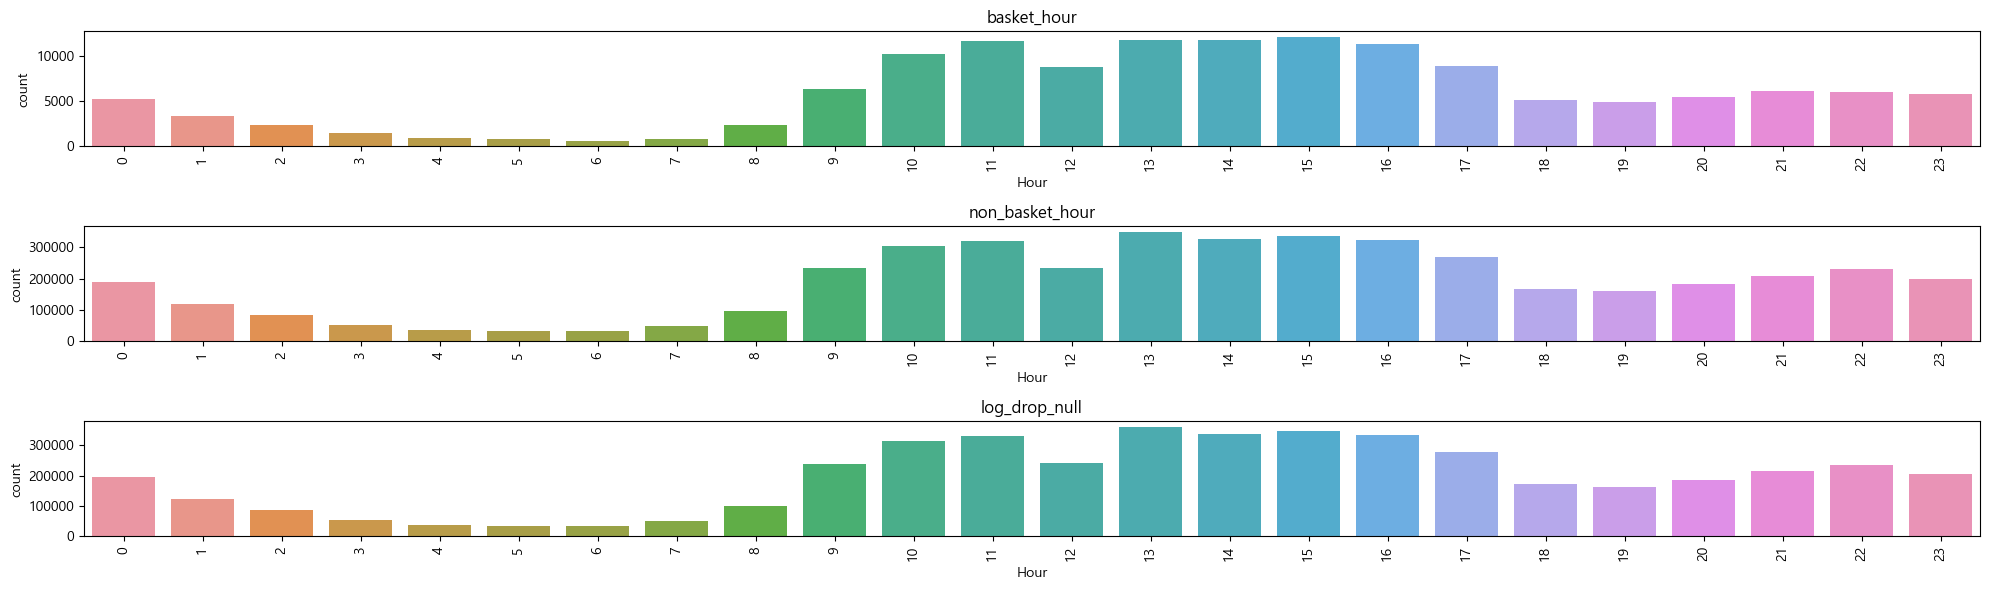

In [21]:
plt.figure(figsize=(20, 6))
plt.subplot(3, 1, 1)
display(basket_hour["Hour"].value_counts(normalize=True))
sns.countplot(data=basket_hour, x="Hour")
plt.title('basket_hour')
plt.xticks(rotation=90)


plt.subplot(3, 1, 2)                
display(non_basket_hour["Hour"].value_counts(normalize=True))
sns.countplot(data=non_basket_hour, x="Hour")
plt.title('non_basket_hour')
plt.xticks(rotation=90)


plt.subplot(3, 1, 3)                
display(log_drop_null["Hour"].value_counts(normalize=True))
sns.countplot(data=log_drop_null, x="Hour")
plt.title('log_drop_null')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Windows      6.522892e-01
Android      1.756621e-01
iOS          1.119223e-01
Mac OS X     5.765672e-02
Linux        1.858465e-03
Chrome OS    2.363489e-04
Other        2.301405e-04
CentOS       6.315483e-05
Ubuntu       4.602810e-05
Tizen        3.425347e-05
FreeBSD      6.422525e-07
Fedora       4.281683e-07
OpenBSD      2.140842e-07
Name: useragent_os, dtype: float64

Windows      0.899954
Mac OS X     0.092167
iOS          0.004001
Linux        0.002256
Android      0.001187
Chrome OS    0.000414
Ubuntu       0.000014
Tizen        0.000007
Name: useragent_os, dtype: float64

Windows      0.921612
Mac OS X     0.073824
iOS          0.002300
Linux        0.001337
Android      0.000802
Chrome OS    0.000125
Name: useragent_os, dtype: float64

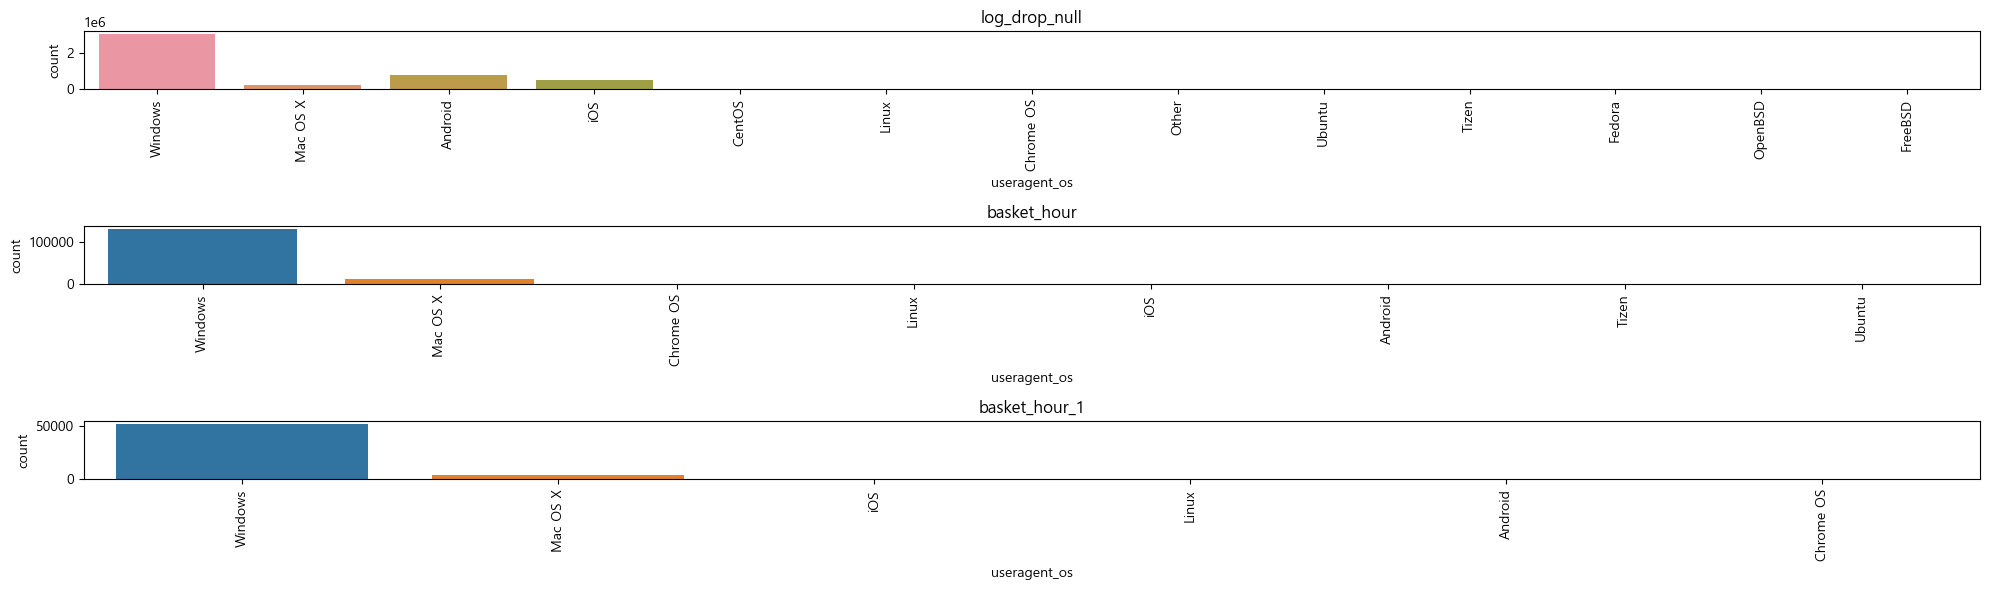

In [94]:
plt.figure(figsize=(20, 6))
plt.subplot(3, 1, 1)
display(log_drop_null["useragent_os"].value_counts(normalize=True))
sns.countplot(data=log_drop_null, x=log_drop_null['useragent_os'])
plt.title('log_drop_null')
plt.xticks(rotation=90)


plt.subplot(3, 1, 2)                
display(basket_hour["useragent_os"].value_counts(normalize=True))
sns.countplot(data=basket_hour, x=basket_hour['useragent_os'])
plt.title('basket_hour')
plt.xticks(rotation=90)


plt.subplot(3, 1, 3)                
display(basket_hour_1["useragent_os"].value_counts(normalize=True))
sns.countplot(data=basket_hour_1, x=basket_hour_1['useragent_os'])
plt.title('basket_hour_1')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Windows      0.474668
Android      0.270808
iOS          0.171572
Mac OS X     0.079242
Linux        0.003115
Chrome OS    0.000220
Other        0.000172
Ubuntu       0.000096
Tizen        0.000055
CentOS       0.000052
Name: useragent_os, dtype: float64

NameError: name 'log_time1' is not defined

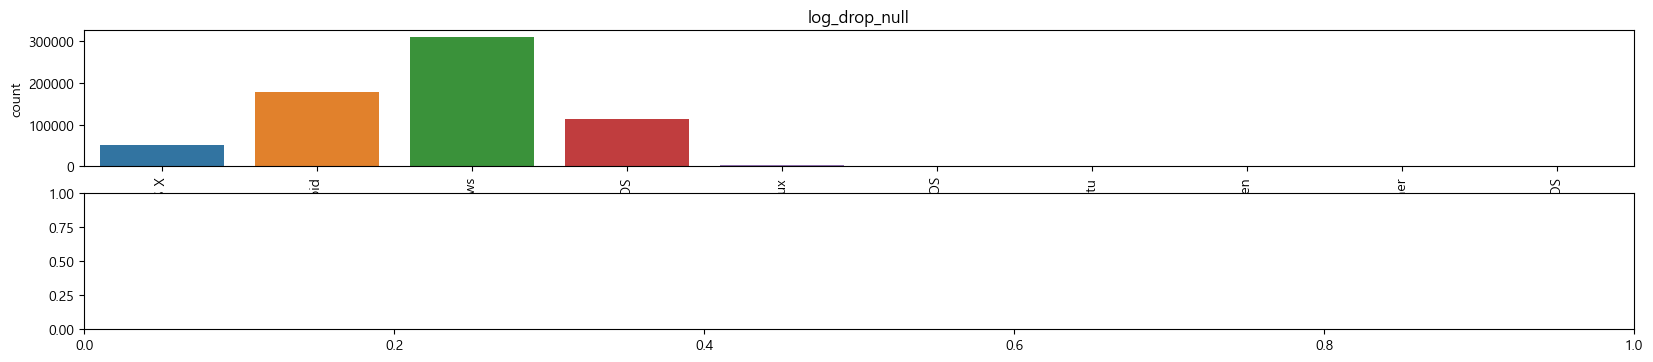

In [117]:
plt.figure(figsize=(20, 6))
plt.subplot(3, 1, 1)

display(log_drop_null["useragent_os"].value_counts(normalize=True))
sns.countplot(data=log_drop_null, x=log_drop_null['useragent_os'])
plt.title('log_drop_null')
plt.xticks(rotation=90)


plt.subplot(3, 1, 2)                

display(log_time1['useragent_os'].value_counts(normalize=True))
sns.countplot(data=log_time1, x=log_time1['useragent_os'])
plt.title('log_drop_null')
plt.xticks(rotation=90)

plt.subplot(3, 1, 3)                

display(log_time2['useragent_os'].value_counts(normalize=True))
sns.countplot(data=log_time2, x=log_time2['useragent_os'])
plt.title('log_drop_null')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [132]:
log_view_time = log_drop_null.loc[log_drop_null["viewtime"] > 0]
log_view_time['viewtime'].median()/1000

18.713

In [133]:
log_view_time["time"] = np.where((log_view_time['Hour'] >= 13)&(log_view_time["Hour"].values <= 17) , "1","0" )

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_1444\3940570260.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_view_time["time"] = np.where((log_view_time['Hour'] >= 13)&(log_view_time["Hour"].values <= 17) , "1","0" )


In [134]:
log_view_time_1 = log_view_time.loc[log_view_time["time"] == "1"]
log_view_time_1['viewtime'].median() / 1000

nan

In [135]:
log_view_time_0 = log_view_time.loc[log_view_time["time"] == "0"]
log_view_time_0['viewtime'].median() / 1000

18.713

In [125]:
log_view_time['viewtime']

collect_time
2022-12-29 17:29:02     80033
2022-12-29 18:45:05      1238
2022-12-29 09:13:14     37161
2022-12-29 15:32:12      8483
2022-12-29 16:15:35      2944
                        ...  
2022-12-28 22:57:13      3462
2022-12-29 11:45:10    228022
2022-12-29 12:45:14      6054
2022-12-28 15:40:29     10006
2022-12-29 12:45:13     47217
Name: viewtime, Length: 3610541, dtype: int64

## basket_uid별로 분석

In [26]:
log_drop_null

,Unnamed: 0,uid,action_type,category1,category2,category3,geoip_city_name,useragent_os,viewrate,viewtime,Hour,Minute
collect_time,,,,,,,,,,,,
2022-12-29 17:29:02,0,avpKyWMn/xEADNlb,View,주방용품,그릇·홈세트,식판·나눔접시,Seongnam-si,Windows,100.0,80033,17,29
2022-12-29 12:56:38,1,0+5vEmGkOuAAB5j2,Basket,패브릭,매트,주방·다용도매트,Yongin-si,Windows,0.0,0,12,56
2022-12-29 17:54:30,3,dC9Fl2Ly9lcADrTn,Highlight,데코·식물,플라워·식물,화병·화분,Gwangmyeong-si,Windows,0.0,0,17,54
2022-12-29 18:45:05,4,09gKcGLg0I8ACyQy,View,가구,진열장·책장,책장,Jongno-gu,Mac OS X,100.0,1238,18,45
2022-12-29 17:53:11,5,091fXGIDYFEABcpA,Basket,수납·정리,화장대·테이블정리,티슈커버·케이스,Incheon,Windows,0.0,0,17,53
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-29 12:45:14,5659533,3yfy5mOZpbYAAMpw,View,가전·디지털,주방가전,오븐·전자레인지,Gangnam-gu,Android,100.0,6054,12,45
2022-12-28 15:40:29,5659534,qE73wWOr1C8ABhBw,View,캠핑용품,캠핑생활용품,기타캠핑생활용품,Songpa-gu,Windows,100.0,10006,15,40
2022-12-28 14:30:09,5659537,PVMstmNg4I4ADq9R,Basket,가구,진열장·책장,책장,Jinju,Windows,0.0,0,14,30


In [27]:
log_uid = list(set(log_drop_null['uid'].to_list()))

In [28]:
len(log_uid)

647910

In [29]:
log_uid_set = log_drop_null.loc[log_drop_null['action_type'] == 'Basket', 'uid']
log_uid_set = list(set(log_uid_set.to_list()))
len(log_uid_set)

34462

In [30]:
basket_uid = log_drop_null[log_drop_null['uid'].isin(log_uid_set)]
basket_uid

,Unnamed: 0,uid,action_type,category1,category2,category3,geoip_city_name,useragent_os,viewrate,viewtime,Hour,Minute
collect_time,,,,,,,,,,,,
2022-12-29 12:56:38,1,0+5vEmGkOuAAB5j2,Basket,패브릭,매트,주방·다용도매트,Yongin-si,Windows,0.0,0,12,56
2022-12-29 17:54:30,3,dC9Fl2Ly9lcADrTn,Highlight,데코·식물,플라워·식물,화병·화분,Gwangmyeong-si,Windows,0.0,0,17,54
2022-12-29 17:53:11,5,091fXGIDYFEABcpA,Basket,수납·정리,화장대·테이블정리,티슈커버·케이스,Incheon,Windows,0.0,0,17,53
2022-12-29 09:13:14,6,Adwku2KoPCwAANbw,View,노하우,꾸미기팁,un_category,Gwanak-gu,Windows,100.0,37161,9,13
2022-12-29 15:50:12,12,Oxh70WOs80cAAJIx,View,생활용품,욕실용품,목욕·샤워용품,un_city_name,Windows,100.0,40015,15,50
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-28 18:17:56,5659522,Di7Ia2OrrcIADRhS,View,가구,서랍·수납장,수납장,Daegu,Windows,100.0,1096,18,17
2022-12-29 14:48:41,5659529,tEHACmOs7eIABtWy,Highlight,패브릭,커튼·부자재,가리개커튼,Suncheon,Windows,0.0,0,14,48
2022-12-28 22:14:15,5659532,cLkIu2OXMw8AA9Dr,Basket,주방용품,주방수납·정리,홀더,Haman,Windows,0.0,0,22,14


In [31]:
for col in list(basket_uid.columns):
    print(col)
    print(basket_uid[col].value_counts(normalize=True))
    print('\n')

Unnamed: 0
1          6.258347e-07
3773826    6.258347e-07
3773917    6.258347e-07
3773910    6.258347e-07
3773904    6.258347e-07
               ...     
1887806    6.258347e-07
1887805    6.258347e-07
1887804    6.258347e-07
1887802    6.258347e-07
5659537    6.258347e-07
Name: Unnamed: 0, Length: 1597866, dtype: float64


uid
un_name             8.268591e-02
doMt0mJwbdMAB+YD    8.359274e-03
doMt1GOIBUUAAESl    4.417141e-03
eZapCGOX9s4ABeVy    3.055951e-03
eZapCGOZHH0ACCny    2.007678e-03
                        ...     
cNjOMmMild4AA/dO    6.258347e-07
0mMo42M6J/cABXUX    6.258347e-07
0+IcwmEogCUAChBK    6.258347e-07
dH1vC19LmYMACsJ6    6.258347e-07
0l0uUmEA4EoABX7b    6.258347e-07
Name: uid, Length: 34462, dtype: float64


action_type
View         0.805444
Basket       0.090717
Highlight    0.087770
Copy         0.011888
SINF         0.004181
Name: action_type, dtype: float64


category1
가구        3.441490e-01
패브릭       1.325943e-01
주방용품      1.196853e-01
데코·식물     7.812232e-02
가전·

In [120]:
for col in list(log_drop_null.columns):
    print(col)
    print(log_drop_null[col].value_counts(normalize=True))
    print('\n')

Unnamed: 0
187        0.000002
3774028    0.000002
3777607    0.000002
3777625    0.000002
3777635    0.000002
             ...   
1872753    0.000002
1872763    0.000002
1872767    0.000002
1872789    0.000002
5659532    0.000002
Name: Unnamed: 0, Length: 655760, dtype: float64


uid
un_name             0.038165
Ou7/0GNRCGsADSX9    0.002165
3mTdImMtPS8ACtk4    0.002024
Ou7/0GMEXxcAAgZn    0.001713
AedgOGNmS2cABI+B    0.001110
                      ...   
023+z2G10uMAApWd    0.000002
diOsRWOpswwAArv+    0.000002
dusPj2OthdIAB4ZS    0.000002
Ae6WjGOkVHQAC88M    0.000002
amWDVmOr0ycAB/2J    0.000002
Name: uid, Length: 129939, dtype: float64


action_type
View         0.895733
Highlight    0.061112
Basket       0.027539
Copy         0.008314
SINF         0.007301
Name: action_type, dtype: float64


category1
가구           0.401356
패브릭          0.114380
주방용품         0.087556
가전·디지털       0.087233
데코·식물        0.067529
               ...   
살롱드제이니       0.000002
피노키오         0.000002
裝飾 植物  

View         0.805444
Basket       0.090717
Highlight    0.087770
Copy         0.011888
SINF         0.004181
Name: action_type, dtype: float64

View         0.862716
Highlight    0.082997
Basket       0.031032
Copy         0.018725
SINF         0.004530
Name: action_type, dtype: float64

Windows      0.834483
Mac OS X     0.083663
iOS          0.048932
Android      0.030531
Linux        0.001733
Chrome OS    0.000392
CentOS       0.000155
Other        0.000069
Ubuntu       0.000041
Tizen        0.000001
FreeBSD      0.000001
Name: useragent_os, dtype: float64

Windows      6.522892e-01
Android      1.756621e-01
iOS          1.119223e-01
Mac OS X     5.765672e-02
Linux        1.858465e-03
Chrome OS    2.363489e-04
Other        2.301405e-04
CentOS       6.315483e-05
Ubuntu       4.602810e-05
Tizen        3.425347e-05
FreeBSD      6.422525e-07
Fedora       4.281683e-07
OpenBSD      2.140842e-07
Name: useragent_os, dtype: float64

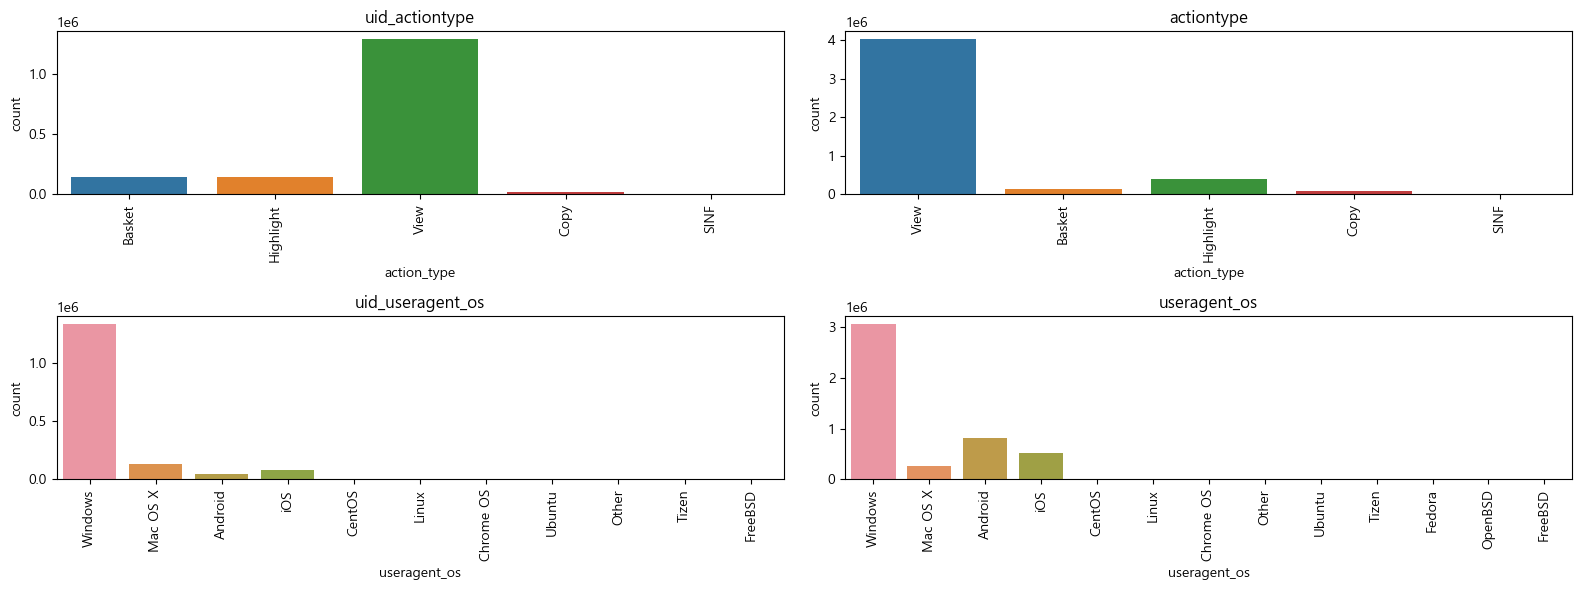

In [32]:
plt.figure(figsize=(16, 6))

plt.subplot(2, 2, 1)
display(basket_uid["action_type"].value_counts(normalize=True))
sns.countplot(data=basket_uid, x="action_type")
plt.title('uid_actiontype')
plt.xticks(rotation=90)



plt.subplot(2, 2, 2)
display(log_drop_null["action_type"].value_counts(normalize=True))
sns.countplot(data=log_drop_null, x="action_type")
plt.title('actiontype')
plt.xticks(rotation=90)



plt.subplot(2, 2, 3)
display(basket_uid["useragent_os"].value_counts(normalize=True))
sns.countplot(data=basket_uid, x="useragent_os")
plt.title('uid_useragent_os')
plt.xticks(rotation=90)


plt.subplot(2, 2, 4)
display(log_drop_null["useragent_os"].value_counts(normalize=True))
sns.countplot(data=log_drop_null, x="useragent_os")
plt.title('useragent_os')
plt.xticks(rotation=90)



plt.tight_layout()
plt.show()

In [33]:
basket_viewtime = basket_uid.loc[basket_uid["viewtime"] > 0]
basket_viewtime.viewtime.mean() / 1000

61.057090990965904

In [121]:
basket_viewtime = basket_uid.loc[basket_uid["viewtime"] > 0]
basket_viewtime.viewtime.median() / 1000

18.017

In [34]:
basket_uid[basket_uid['useragent_os'].str.contains('Windows|Android|iOS|Mac OS X')]

,Unnamed: 0,uid,action_type,category1,category2,category3,geoip_city_name,useragent_os,viewrate,viewtime,Hour,Minute
collect_time,,,,,,,,,,,,
2022-12-29 12:56:38,1,0+5vEmGkOuAAB5j2,Basket,패브릭,매트,주방·다용도매트,Yongin-si,Windows,0.0,0,12,56
2022-12-29 17:54:30,3,dC9Fl2Ly9lcADrTn,Highlight,데코·식물,플라워·식물,화병·화분,Gwangmyeong-si,Windows,0.0,0,17,54
2022-12-29 17:53:11,5,091fXGIDYFEABcpA,Basket,수납·정리,화장대·테이블정리,티슈커버·케이스,Incheon,Windows,0.0,0,17,53
2022-12-29 09:13:14,6,Adwku2KoPCwAANbw,View,노하우,꾸미기팁,un_category,Gwanak-gu,Windows,100.0,37161,9,13
2022-12-29 15:50:12,12,Oxh70WOs80cAAJIx,View,생활용품,욕실용품,목욕·샤워용품,un_city_name,Windows,100.0,40015,15,50
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-28 18:17:56,5659522,Di7Ia2OrrcIADRhS,View,가구,서랍·수납장,수납장,Daegu,Windows,100.0,1096,18,17
2022-12-29 14:48:41,5659529,tEHACmOs7eIABtWy,Highlight,패브릭,커튼·부자재,가리개커튼,Suncheon,Windows,0.0,0,14,48
2022-12-28 22:14:15,5659532,cLkIu2OXMw8AA9Dr,Basket,주방용품,주방수납·정리,홀더,Haman,Windows,0.0,0,22,14


In [35]:
basket_uid["useragent_os"] = np.where((basket_uid['useragent_os'] == 'Android')|(basket_uid["useragent_os"] == 'iOS') , "1","0" )

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_1444\1575835986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basket_uid["useragent_os"] = np.where((basket_uid['useragent_os'] == 'Android')|(basket_uid["useragent_os"] == 'iOS') , "1","0" )


In [36]:
basket_mobile = basket_uid[basket_uid['useragent_os'] == '1']
basket_mobile = basket_mobile[basket_mobile['viewtime'] > 0]
basket_mobile.viewtime.mean() / 1000

168.45815233658053

In [37]:
basket_mobile = basket_uid[basket_uid['useragent_os'] == '1']
basket_mobile = basket_mobile[basket_mobile['viewtime'] > 0]
basket_mobile.viewtime.median() / 1000

14.008

In [38]:
basket_desktop = basket_uid[basket_uid['useragent_os'] == '0']
basket_desktop = basket_desktop[basket_desktop['viewtime'] > 0]
basket_desktop.viewtime.mean() / 1000

60.39102929554626

In [39]:
basket_desktop = basket_uid[basket_uid['useragent_os'] == '0']
basket_desktop = basket_desktop[basket_desktop['viewtime'] > 0]
basket_desktop.viewtime.median() / 1000

18.018

## non basket_uid

In [40]:
log_drop_null

,Unnamed: 0,uid,action_type,category1,category2,category3,geoip_city_name,useragent_os,viewrate,viewtime,Hour,Minute
collect_time,,,,,,,,,,,,
2022-12-29 17:29:02,0,avpKyWMn/xEADNlb,View,주방용품,그릇·홈세트,식판·나눔접시,Seongnam-si,Windows,100.0,80033,17,29
2022-12-29 12:56:38,1,0+5vEmGkOuAAB5j2,Basket,패브릭,매트,주방·다용도매트,Yongin-si,Windows,0.0,0,12,56
2022-12-29 17:54:30,3,dC9Fl2Ly9lcADrTn,Highlight,데코·식물,플라워·식물,화병·화분,Gwangmyeong-si,Windows,0.0,0,17,54
2022-12-29 18:45:05,4,09gKcGLg0I8ACyQy,View,가구,진열장·책장,책장,Jongno-gu,Mac OS X,100.0,1238,18,45
2022-12-29 17:53:11,5,091fXGIDYFEABcpA,Basket,수납·정리,화장대·테이블정리,티슈커버·케이스,Incheon,Windows,0.0,0,17,53
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-29 12:45:14,5659533,3yfy5mOZpbYAAMpw,View,가전·디지털,주방가전,오븐·전자레인지,Gangnam-gu,Android,100.0,6054,12,45
2022-12-28 15:40:29,5659534,qE73wWOr1C8ABhBw,View,캠핑용품,캠핑생활용품,기타캠핑생활용품,Songpa-gu,Windows,100.0,10006,15,40
2022-12-28 14:30:09,5659537,PVMstmNg4I4ADq9R,Basket,가구,진열장·책장,책장,Jinju,Windows,0.0,0,14,30


In [41]:
log_uid = list(set(log_drop_null['uid'].to_list()))
len(log_uid)

647910

In [42]:
non_uid_set = log_drop_null.loc[log_drop_null['action_type'] != 'Basket', 'uid']
non_uid_set = list(set(non_uid_set.to_list()))
len(non_uid_set)

647728

In [43]:
non_basket_uid = log_drop_null[log_drop_null['uid'].isin(non_uid_set)]
non_basket_uid

,Unnamed: 0,uid,action_type,category1,category2,category3,geoip_city_name,useragent_os,viewrate,viewtime,Hour,Minute
collect_time,,,,,,,,,,,,
2022-12-29 17:29:02,0,avpKyWMn/xEADNlb,View,주방용품,그릇·홈세트,식판·나눔접시,Seongnam-si,Windows,100.0,80033,17,29
2022-12-29 12:56:38,1,0+5vEmGkOuAAB5j2,Basket,패브릭,매트,주방·다용도매트,Yongin-si,Windows,0.0,0,12,56
2022-12-29 17:54:30,3,dC9Fl2Ly9lcADrTn,Highlight,데코·식물,플라워·식물,화병·화분,Gwangmyeong-si,Windows,0.0,0,17,54
2022-12-29 18:45:05,4,09gKcGLg0I8ACyQy,View,가구,진열장·책장,책장,Jongno-gu,Mac OS X,100.0,1238,18,45
2022-12-29 17:53:11,5,091fXGIDYFEABcpA,Basket,수납·정리,화장대·테이블정리,티슈커버·케이스,Incheon,Windows,0.0,0,17,53
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-29 12:45:14,5659533,3yfy5mOZpbYAAMpw,View,가전·디지털,주방가전,오븐·전자레인지,Gangnam-gu,Android,100.0,6054,12,45
2022-12-28 15:40:29,5659534,qE73wWOr1C8ABhBw,View,캠핑용품,캠핑생활용품,기타캠핑생활용품,Songpa-gu,Windows,100.0,10006,15,40
2022-12-28 14:30:09,5659537,PVMstmNg4I4ADq9R,Basket,가구,진열장·책장,책장,Jinju,Windows,0.0,0,14,30


In [44]:
for col in list(non_basket_uid.columns):
    print(col)
    print(non_basket_uid[col].value_counts(normalize=True))
    print('\n')

Unnamed: 0
0          2.140939e-07
3775251    2.140939e-07
3775258    2.140939e-07
3775257    2.140939e-07
3775256    2.140939e-07
               ...     
1888385    2.140939e-07
1888386    2.140939e-07
1888387    2.140939e-07
1888388    2.140939e-07
5659540    2.140939e-07
Name: Unnamed: 0, Length: 4670848, dtype: float64


uid
un_name             2.828630e-02
Ou7/0GNRCGsADSX9    3.163237e-03
doMt0mJwbdMAB+YD    2.859652e-03
doMt1GJwbywACgRw    2.034534e-03
Ou7/0GMEXxcAAgZn    1.932197e-03
                        ...     
3u6SQGOqu5cAAYz0    2.140939e-07
dusE7GMxlRUACC16    2.140939e-07
e9Ukj2OZM2gAA9h9    2.140939e-07
r9O412OnRp0AA4LZ    2.140939e-07
dusqTmOtPa8AB46D    2.140939e-07
Name: uid, Length: 647728, dtype: float64


action_type
View         0.862755
Highlight    0.083000
Basket       0.030988
Copy         0.018726
SINF         0.004530
Name: action_type, dtype: float64


category1
가구        3.566286e-01
패브릭       1.164632e-01
주방용품      9.764544e-02
가전·디지털    9.194926e-02
데코

View         0.862755
Highlight    0.083000
Basket       0.030988
Copy         0.018726
SINF         0.004530
Name: action_type, dtype: float64

View         0.862716
Highlight    0.082997
Basket       0.031032
Copy         0.018725
SINF         0.004530
Name: action_type, dtype: float64

Windows      6.522794e-01
Android      1.756698e-01
iOS          1.119272e-01
Mac OS X     5.765441e-02
Linux        1.857907e-03
Chrome OS    2.363597e-04
Other        2.301509e-04
CentOS       6.315770e-05
Ubuntu       4.603019e-05
Tizen        3.425502e-05
FreeBSD      6.422817e-07
Fedora       4.281878e-07
OpenBSD      2.140939e-07
Name: useragent_os, dtype: float64

Windows      6.522892e-01
Android      1.756621e-01
iOS          1.119223e-01
Mac OS X     5.765672e-02
Linux        1.858465e-03
Chrome OS    2.363489e-04
Other        2.301405e-04
CentOS       6.315483e-05
Ubuntu       4.602810e-05
Tizen        3.425347e-05
FreeBSD      6.422525e-07
Fedora       4.281683e-07
OpenBSD      2.140842e-07
Name: useragent_os, dtype: float64

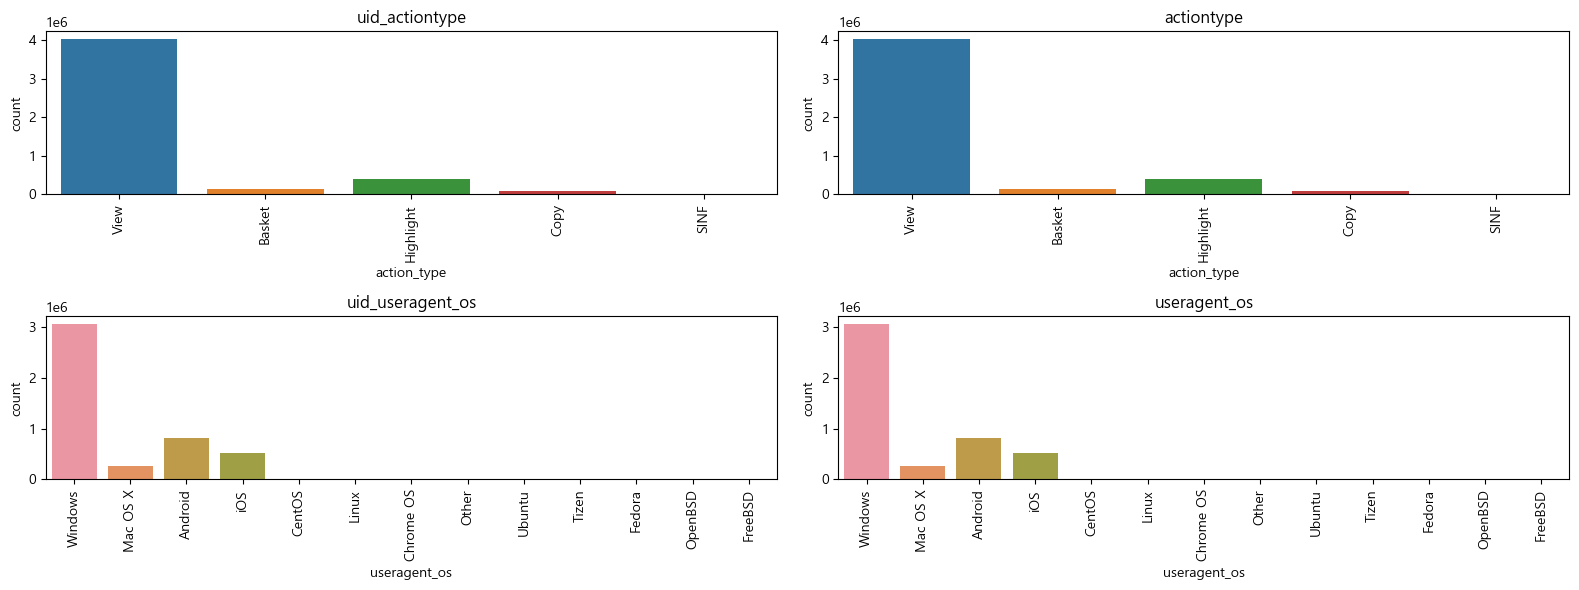

In [45]:
plt.figure(figsize=(16, 6))

plt.subplot(2, 2, 1)
display(non_basket_uid["action_type"].value_counts(normalize=True))
sns.countplot(data=non_basket_uid, x="action_type")
plt.title('uid_actiontype')
plt.xticks(rotation=90)



plt.subplot(2, 2, 2)
display(log_drop_null["action_type"].value_counts(normalize=True))
sns.countplot(data=log_drop_null, x="action_type")
plt.title('actiontype')
plt.xticks(rotation=90)



plt.subplot(2, 2, 3)
display(non_basket_uid["useragent_os"].value_counts(normalize=True))
sns.countplot(data=non_basket_uid, x="useragent_os")
plt.title('uid_useragent_os')
plt.xticks(rotation=90)


plt.subplot(2, 2, 4)
display(log_drop_null["useragent_os"].value_counts(normalize=True))
sns.countplot(data=log_drop_null, x="useragent_os")
plt.title('useragent_os')
plt.xticks(rotation=90)



plt.tight_layout()
plt.show()

In [46]:
non_basket_viewtime = non_basket_uid.loc[non_basket_uid["viewtime"] > 0]
non_basket_viewtime.viewtime.mean() / 1000

65.52303954670505

In [47]:
non_basket_uid[non_basket_uid['useragent_os'].str.contains('Windows|Android|iOS|Mac OS X')]

,Unnamed: 0,uid,action_type,category1,category2,category3,geoip_city_name,useragent_os,viewrate,viewtime,Hour,Minute
collect_time,,,,,,,,,,,,
2022-12-29 17:29:02,0,avpKyWMn/xEADNlb,View,주방용품,그릇·홈세트,식판·나눔접시,Seongnam-si,Windows,100.0,80033,17,29
2022-12-29 12:56:38,1,0+5vEmGkOuAAB5j2,Basket,패브릭,매트,주방·다용도매트,Yongin-si,Windows,0.0,0,12,56
2022-12-29 17:54:30,3,dC9Fl2Ly9lcADrTn,Highlight,데코·식물,플라워·식물,화병·화분,Gwangmyeong-si,Windows,0.0,0,17,54
2022-12-29 18:45:05,4,09gKcGLg0I8ACyQy,View,가구,진열장·책장,책장,Jongno-gu,Mac OS X,100.0,1238,18,45
2022-12-29 17:53:11,5,091fXGIDYFEABcpA,Basket,수납·정리,화장대·테이블정리,티슈커버·케이스,Incheon,Windows,0.0,0,17,53
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-29 12:45:14,5659533,3yfy5mOZpbYAAMpw,View,가전·디지털,주방가전,오븐·전자레인지,Gangnam-gu,Android,100.0,6054,12,45
2022-12-28 15:40:29,5659534,qE73wWOr1C8ABhBw,View,캠핑용품,캠핑생활용품,기타캠핑생활용품,Songpa-gu,Windows,100.0,10006,15,40
2022-12-28 14:30:09,5659537,PVMstmNg4I4ADq9R,Basket,가구,진열장·책장,책장,Jinju,Windows,0.0,0,14,30


In [48]:
non_basket_uid["useragent_os"] = np.where((non_basket_uid['useragent_os'] == 'Android')|(non_basket_uid["useragent_os"] == 'iOS') , "1","0" )

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_1444\3357319109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_basket_uid["useragent_os"] = np.where((non_basket_uid['useragent_os'] == 'Android')|(non_basket_uid["useragent_os"] == 'iOS') , "1","0" )


In [49]:
non_basket_mobile = non_basket_uid[non_basket_uid['useragent_os'] == '1']
non_basket_mobile = non_basket_mobile[non_basket_mobile['viewtime'] > 0]
non_basket_mobile.viewtime.mean() / 1000

78.28488843993917

In [50]:
non_basket_mobile = non_basket_uid[non_basket_uid['useragent_os'] == '1']
non_basket_mobile = non_basket_mobile[non_basket_mobile['viewtime'] > 0]
non_basket_mobile.viewtime.median() / 1000

18.008

In [51]:
non_basket_desktop = non_basket_uid[non_basket_uid['useragent_os'] == '0']
non_basket_desktop = non_basket_desktop[non_basket_desktop['viewtime'] > 0]
non_basket_desktop.viewtime.mean() / 1000

60.91853943529527

In [52]:
non_basket_desktop = non_basket_uid[non_basket_uid['useragent_os'] == '0']
non_basket_desktop = non_basket_desktop[non_basket_desktop['viewtime'] > 0]
non_basket_desktop.viewtime.median() / 1000

17.432

## 카이제곱검정

In [53]:
# # 바스켓 데이터와 바스켓이 아닌 데이터중 모바일과 데스크탑 

# log_drop_null = log_drop_null[log_drop_null['useragent_os'].str.contains('Windows|Android|iOS|Mac OS X')]
# # 윈도우, 안드로이드, ios, mac 만 남기고 나머지 drop


# log_drop_null["useragent_os"] = np.where((log_drop_null['useragent_os'] == 'Android')|
#                                          (log_drop_null["useragent_os"] == 'iOS') , "1","0" )

# # 모바일 (안드로이드, ios)은 1, 나머지는 0


# log_drop_null["viewrate"] = np.where((log_drop_null['viewrate'] != 0), "1","0" )

# # 뷰레이트는 


# log_basket = log_drop_null[log_drop_null['action_type']=='Basket'][['viewrate']]
# log_non_basket = log_drop_null[log_drop_null['action_type']!='Basket'][['viewrate']]


# total_basket = pd.concat([pd.get_dummies(log_basket),
#                           log_drop_null[log_drop_null['action_type']=='Basket']
#                           [['useragent_os']]],axis=1)

# total_non_basket = pd.concat([pd.get_dummies(log_non_basket),
#                               log_drop_null[log_drop_null['action_type']!='Basket']
#                               [['useragent_os']]],axis=1)


# a_0 = total_basket[total_basket['useragent_os']=='0'].shape[0]
# a_1 = total_basket[total_basket['useragent_os']=='1'].shape[0]
# b_0 = total_non_basket[total_non_basket['useragent_os']=='0'].shape[0]
# b_1 = total_non_basket[total_non_basket['useragent_os']=='1'].shape[0]

# dataset_chi = [[a_0, a_1], [b_0, b_1]]
# pval = stats.chi2_contingency(dataset_chi)[1]
# print('p-value : ',round(pval,5))

In [54]:
# 모바일과 데스크탑중 바스켓의 비율

log_drop_null = log_drop_null[log_drop_null['useragent_os'].str.contains('Windows|Android|iOS|Mac OS X')]
# 윈도우, 안드로이드, ios, mac 만 남기고 나머지 drop


log_drop_null["useragent_os"] = np.where((log_drop_null['useragent_os'] == 'Android')|
                                         (log_drop_null["useragent_os"] == 'iOS') , "1","0" )

# 모바일 (안드로이드, ios)은 1, 나머지는 0


log_drop_null["viewrate"] = np.where((log_drop_null['viewrate'] != 0), "1","0" )

# 뷰레이트는 혹시나해서?


log_basket = log_drop_null[log_drop_null['useragent_os']=='0'][['viewrate']]
log_non_basket = log_drop_null[log_drop_null['useragent_os']=='1'][['viewrate']]


total_basket = pd.concat([pd.get_dummies(log_basket),
                          log_drop_null[log_drop_null['useragent_os']=='0']
                          [['action_type']]],axis=1)

total_non_basket = pd.concat([pd.get_dummies(log_non_basket),
                              log_drop_null[log_drop_null['useragent_os']=='1']
                              [['action_type']]],axis=1)


a_0 = total_basket[total_basket['action_type']=='Basket'].shape[0]
a_1 = total_basket[total_basket['action_type']!='Basket'].shape[0]
b_0 = total_non_basket[total_non_basket['action_type']=='Basket'].shape[0]
b_1 = total_non_basket[total_non_basket['action_type']!='Basket'].shape[0]

dataset_chi = [[a_0, a_1], [b_0, b_1]]
pval = stats.chi2_contingency(dataset_chi)[1]
print('p-value : ',round(pval,5))

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_1444\2935493070.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_drop_null["useragent_os"] = np.where((log_drop_null['useragent_os'] == 'Android')|
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_1444\2935493070.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_drop_null["viewrate"] = np.where((log_drop_null['viewrate'] != 0), "1","0" )


p-value :  0.0


(array([-2.e+07,  0.e+00,  2.e+07,  4.e+07,  6.e+07,  8.e+07,  1.e+08]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

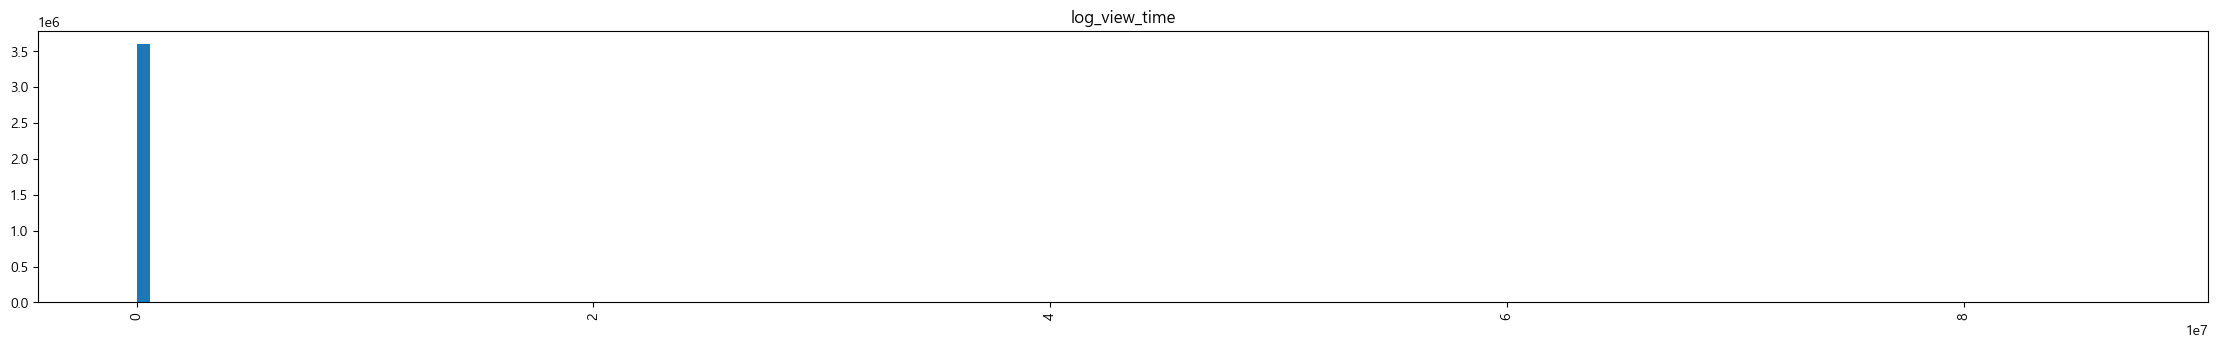

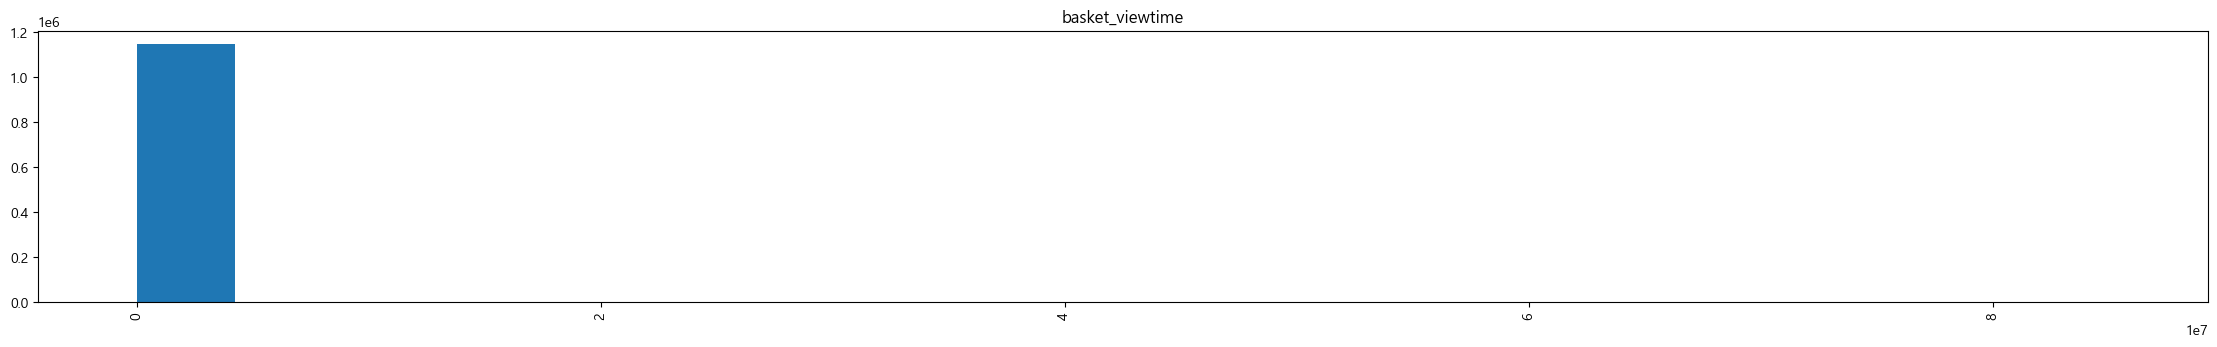

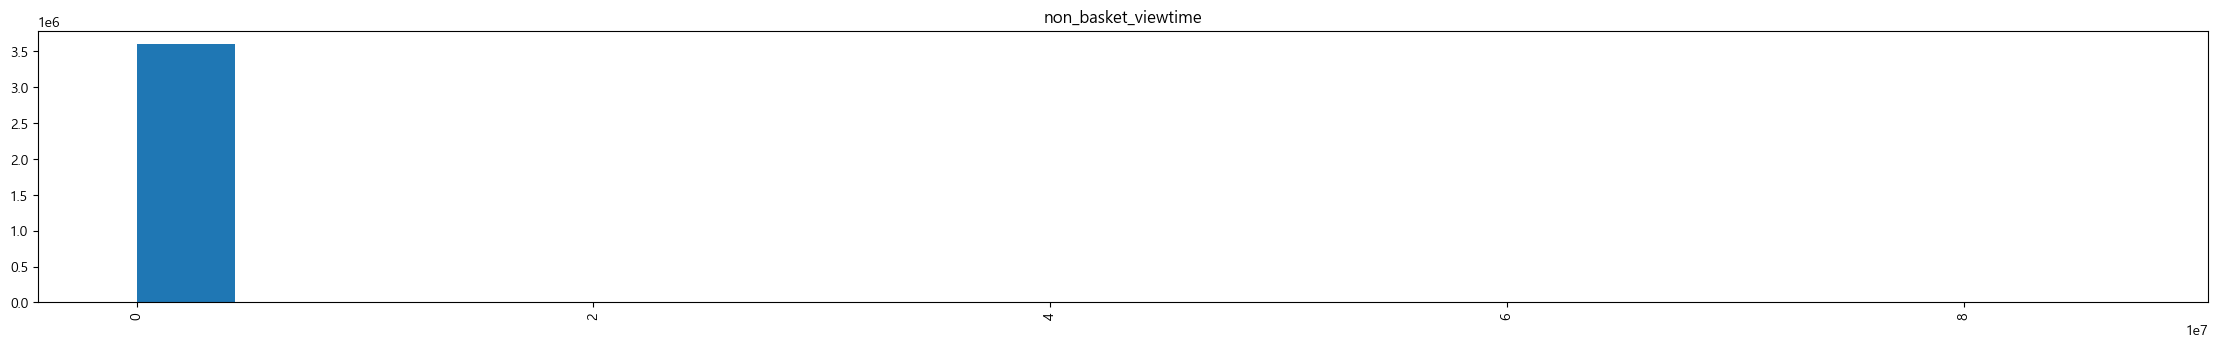

In [124]:


plt.figure(figsize=(28, 12))
plt.subplot(3, 1, 1)
plt.hist(log_view_time['viewtime'], bins=150)
plt.title('log_view_time')
plt.xticks(rotation=90)


plt.figure(figsize=(28, 12))
plt.subplot(3, 1, 2)
plt.hist(basket_viewtime.viewtime, bins=20)
plt.title('basket_viewtime')
plt.xticks(rotation=90)




plt.figure(figsize=(28, 12))
plt.subplot(3, 1, 3)
plt.hist(non_basket_viewtime.viewtime, bins=20)
plt.title('non_basket_viewtime')
plt.xticks(rotation=90)


(array([1]), [Text(0, 0, '')])

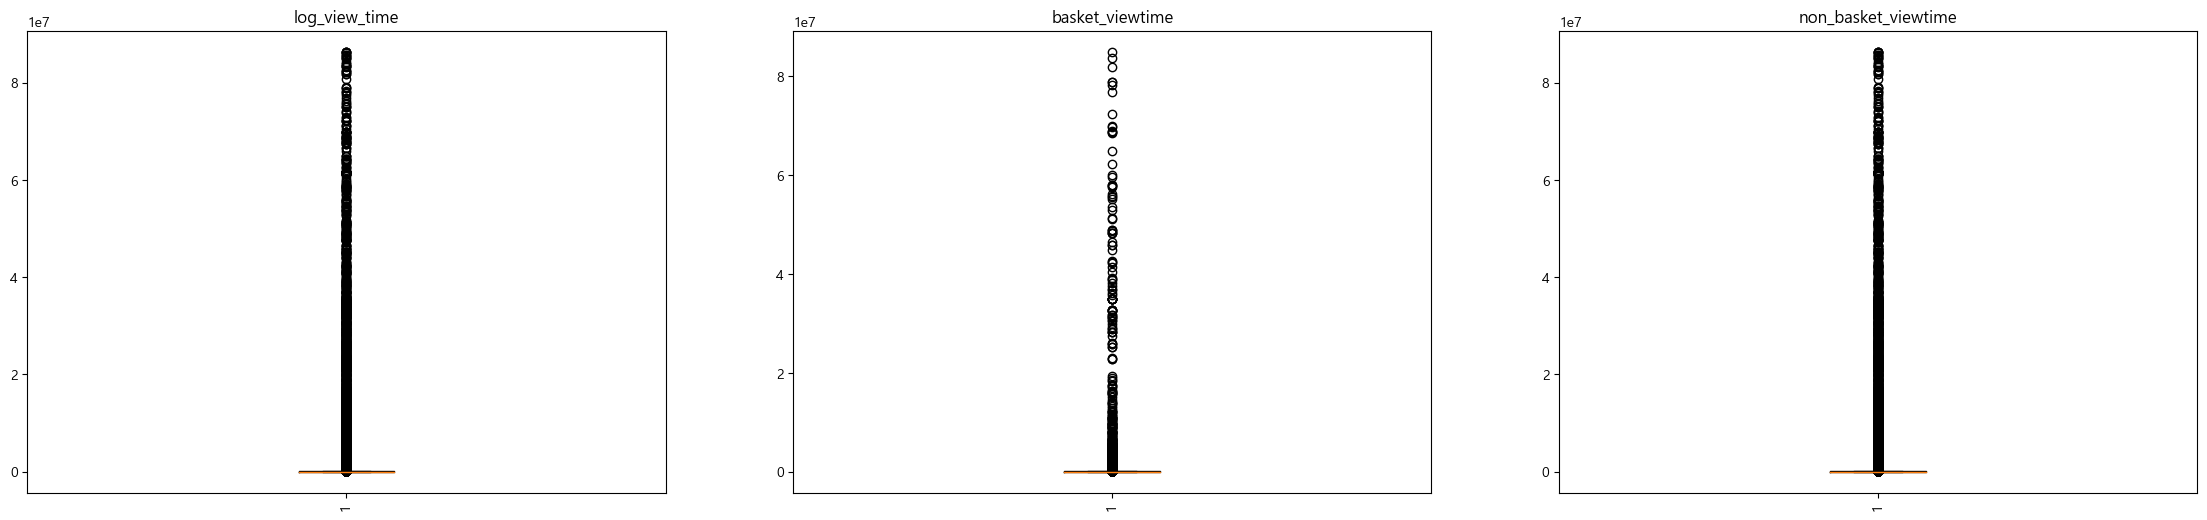

In [129]:


plt.figure(figsize=(28, 6))
plt.subplot(1, 3, 1)
plt.boxplot(log_view_time['viewtime'])
plt.title('log_view_time')
plt.xticks(rotation=90)


plt.subplot(1, 3, 2)
plt.boxplot(basket_viewtime.viewtime)
plt.title('basket_viewtime')
plt.xticks(rotation=90)


plt.subplot(1, 3, 3)
plt.boxplot(non_basket_viewtime.viewtime)
plt.title('non_basket_viewtime')
plt.xticks(rotation=90)
